Submitted by : 

Lakshita 19csu166,

 Madhur19csu169, 
 
 Mitali19csu177, 
 
 Nancy19csu403

 **Skin Burn Classification Project using various Deep Learning Techniques and Convolution Neural Networks**

In [ ]:
#Basic CNN
#Importing various deep learning Lib
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Mounting Colab with Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Mounting dataset to drive
data = '/content/drive/MyDrive/datasets'

In [ ]:
#Mounting dataset to drive
data = '/content/drive/MyDrive/datasets/train'

In [ ]:
import os
len(os.listdir('/content/drive/MyDrive/datasets/train'))

3

***Printing out the Number of Classes ***

In [ ]:
#Printing the number of classes
classes = os.listdir(data)
print(classes)

['degree2', 'degree1', 'degree0']


In [ ]:
degree0 = os.listdir( "/content/drive/MyDrive/datasets/train/degree0")
print('No. of training examples for 0 degree burns:', len(degree0))
print(degree0[:5])

No. of training examples for 0 degree burns: 498
['img10.jpg', 'img1001.jpg', 'img1004.jpg', 'img1009.jpg', 'img0.jpg']


In [ ]:
degree1 = os.listdir("/content/drive/MyDrive/datasets/train/degree1")
print('No. of training examples for 1 degree burns:', len(degree1))
print(degree1[:5])

No. of training examples for 1 degree burns: 248
['img1027.jpg', 'img1031.jpg', 'img1.jpg', 'img1041.jpg', 'img1029.jpg']


In [ ]:
degree2 = os.listdir( "/content/drive/MyDrive/datasets/train/degree2")
print('No. of training examples for 2 degree burns:', len(degree2))
print(degree2[:5])

No. of training examples for 2 degree burns: 176
['img1090.jpg', 'img1002.jpg', 'img1055.jpg', 'img1068.jpg', 'img1118.jpg']


In [ ]:
dataset = ImageFolder(data, transform=ToTensor())

In [ ]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 158, 319]) 0


tensor([[[0.8314, 0.8118, 0.7961,  ..., 0.9137, 0.9216, 0.8980],
         [0.8118, 0.8000, 0.7922,  ..., 0.9137, 0.9176, 0.8941],
         [0.7843, 0.7882, 0.7843,  ..., 0.9098, 0.9098, 0.8863],
         ...,
         [0.6902, 0.6902, 0.6824,  ..., 0.4941, 0.4902, 0.5059],
         [0.6941, 0.6863, 0.6745,  ..., 0.4824, 0.4824, 0.5020],
         [0.7176, 0.7059, 0.6863,  ..., 0.4667, 0.4745, 0.5020]],

        [[0.6588, 0.6392, 0.6235,  ..., 0.7843, 0.7922, 0.7686],
         [0.6392, 0.6275, 0.6196,  ..., 0.7843, 0.7882, 0.7647],
         [0.6118, 0.6157, 0.6118,  ..., 0.7804, 0.7804, 0.7569],
         ...,
         [0.5137, 0.5137, 0.5059,  ..., 0.2941, 0.2902, 0.3059],
         [0.5176, 0.5098, 0.4980,  ..., 0.2824, 0.2824, 0.3020],
         [0.5412, 0.5294, 0.5098,  ..., 0.2667, 0.2745, 0.3020]],

        [[0.5059, 0.4863, 0.4706,  ..., 0.6549, 0.6627, 0.6392],
         [0.4863, 0.4745, 0.4667,  ..., 0.6549, 0.6588, 0.6353],
         [0.4588, 0.4627, 0.4588,  ..., 0.6510, 0.6510, 0.

Image of Degree_0 Burn

Label: degree0


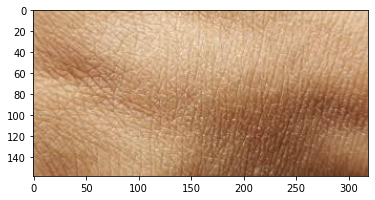

In [ ]:
plt.rcParams['figure.facecolor'] = '#ffffff'
def show_example(img, label):
    print('Label:',dataset.classes[label])
    plt.imshow(img.permute(1, 2, 0))
show_example(*dataset[0])


Image of Degree_2 burn

Label: degree2


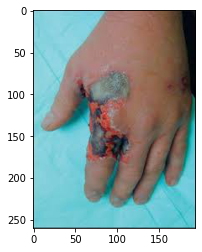

In [ ]:
show_example(*dataset[909])

Label: degree0


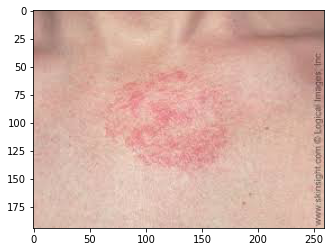

In [ ]:
show_example(*dataset[166])

Label: degree0


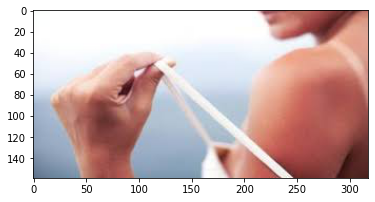

In [ ]:
show_example(*dataset[309])

Label: degree0


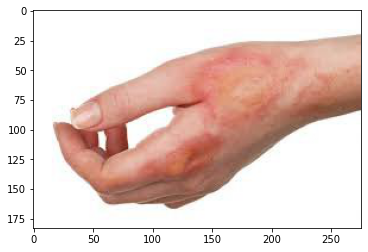

In [ ]:
show_example(*dataset[460])

Image of Degree_2 burn

Label: degree2


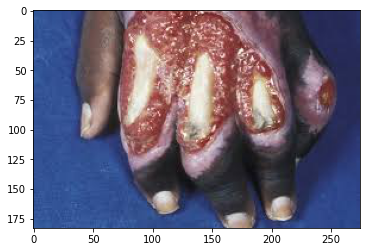

In [ ]:
show_example(*dataset[834])

Label: degree2


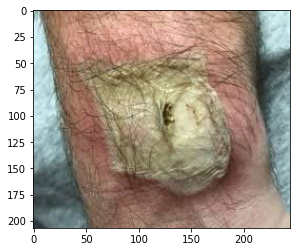

In [ ]:
show_example(*dataset[821])

**Image of Degree_1 burn**

Label: degree1


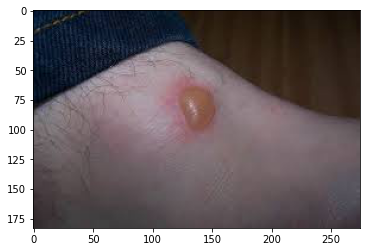

In [ ]:
show_example(*dataset[621])

**Implementation using basic Convolution Neural Networks**

In [ ]:
#Basic CNN
#Importing various deep learning Lib
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#Preprocessing Training Set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 920 images belonging to 3 classes.


In [ ]:
#Preprocessing Testing set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 540 images belonging to 3 classes.


In [ ]:
# Re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/datasets/train'
valid_path = '/content/drive/MyDrive/datasets/test'

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 920 files belonging to 3 classes.
Using 736 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 540 files belonging to 3 classes.
Using 108 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['degree0', 'degree1', 'degree2']


In [ ]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 72s 2s/step - loss: 1.0897 - accuracy: 0.4959 - val_loss: 0.8458 - val_accuracy: 0.5741
Epoch 2/25
23/23 [==============================] - 24s 1s/step - loss: 0.9326 - accuracy: 0.5625 - val_loss: 0.7602 - val_accuracy: 0.6574
Epoch 3/25
23/23 [==============================] - 22s 943ms/step - loss: 0.8117 - accuracy: 0.6264 - val_loss: 0.6345 - val_accuracy: 0.7778
Epoch 4/25
23/23 [==============================] - 22s 953ms/step - loss: 0.7038 - accuracy: 0.6889 - val_loss: 0.6704 - val_accuracy: 0.7130
Epoch 5/25
23/23 [==============================] - 22s 935ms/step - loss: 0.6072 - accuracy: 0.7446 - val_loss: 0.5381 - val_accuracy: 0.7778
Epoch 6/25
23/23 [==============================] - 22s 934ms/step - loss: 0.4989 - accuracy: 0.7989 - val_loss: 0.4824 - val_accuracy: 0.7963
Epoch 7/25
23/23 [==============================] - 22s 931ms/step - loss: 0.4263 - accuracy: 0.8302 - val_loss: 0.4692 - val_accuracy: 0.8426
Epoch 8/25
23/23

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
29/29 [==============================] - 30s 995ms/step - loss: 0.7369 - accuracy: 0.6406 - val_loss: 0.6379 - val_accuracy: 0.6667
Epoch 2/5
29/29 [==============================] - 26s 907ms/step - loss: 0.6378 - accuracy: 0.6667 - val_loss: 0.6371 - val_accuracy: 0.6667
Epoch 3/5
29/29 [==============================] - 26s 912ms/step - loss: 0.6371 - accuracy: 0.6667 - val_loss: 0.6368 - val_accuracy: 0.6667
Epoch 4/5
29/29 [==============================] - 27s 947ms/step - loss: 0.6368 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 5/5
29/29 [==============================] - 28s 981ms/step - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667


training_loss: 63.7% 

training_accuracy: 66.7% 

val_loss: 63.65%

val_accuracy: 66.6% 





In [ ]:
tf.keras.models.save_model(cnn,'my_model2.hdf5')

**Setting up GPU on Colab**

In [ ]:
#Setting up GPU on COLAB
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


**Classification of skin burns using keras ResNet50 model**

In [ ]:
# import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# Re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/datasets/train'
valid_path = '/content/drive/MyDrive/datasets/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('train')

In [ ]:
folders

[]

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 920 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 540 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
29/29 [==============================] - 606s 21s/step - loss: 3.5972 - accuracy: 0.4033 - val_loss: 1.2365 - val_accuracy: 0.3167
Epoch 2/25
29/29 [==============================] - 297s 10s/step - loss: 1.3051 - accuracy: 0.4609 - val_loss: 1.3584 - val_accuracy: 0.6019
Epoch 3/25
29/29 [==============================] - 246s 9s/step - loss: 1.0279 - accuracy: 0.5565 - val_loss: 0.9004 - val_accuracy: 0.6037
Epoch 4/25
29/29 [==============================] - 300s 10s/step - loss: 1.0516 - accuracy: 0.5413 - val_loss: 0.9614 - val_accuracy: 0.3963
Epoch 5/25
29/29 [==============================] - 232s 8s/step - loss: 1.0582 - accuracy: 0.5467 - val_loss: 1.3906 - val_accuracy: 0.2537
Epoch 6/25
29/29 [==============================] - 292s 10s/step - loss: 1.2048 - accuracy: 0.5380 - val_loss: 1.4365 - val_accuracy: 0.5926
Epoch 7/25
29/29 [==============================] - 233s 8s/step - loss: 1.3697 - accuracy: 0.4630 - val_loss: 0.8841 - val_accuracy: 0.6352
Epoch 8/2

training_loss: 79.7%

accuracy: 64.7%

 val_loss: 62.58%
 
 val_accuracy: 74.26%

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**Classification using  Keras InceptionV3 model**

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/datasets/train'
valid_path = '/content/drive/MyDrive/datasets/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/datasets/train/*')

In [ ]:
folders

['/content/drive/MyDrive/datasets/train/degree2',
 '/content/drive/MyDrive/datasets/train/degree1',
 '/content/drive/MyDrive/datasets/train/degree0']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
#Pre-processing of dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 920 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 540 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
29/29 [==============================] - 266s 9s/step - loss: 7.4750 - accuracy: 0.5163 - val_loss: 1.3016 - val_accuracy: 0.7574
Epoch 2/25
29/29 [==============================] - 147s 5s/step - loss: 1.9453 - accuracy: 0.7402 - val_loss: 0.8410 - val_accuracy: 0.8222
Epoch 3/25
29/29 [==============================] - 148s 5s/step - loss: 1.7247 - accuracy: 0.7446 - val_loss: 1.0493 - val_accuracy: 0.7593
Epoch 4/25
29/29 [==============================] - 147s 5s/step - loss: 0.9357 - accuracy: 0.8207 - val_loss: 0.5443 - val_accuracy: 0.8796
Epoch 5/25
29/29 [==============================] - 148s 5s/step - loss: 0.7706 - accuracy: 0.8380 - val_loss: 0.6986 - val_accuracy: 0.8500
Epoch 6/25
29/29 [==============================] - 149s 5s/step - loss: 0.8621 - accuracy: 0.8250 - val_loss: 0.9483 - val_accuracy: 0.8278
Epoch 7/25
29/29 [==============================] - 149s 5s/step - loss: 0.6241 - accuracy: 0.8772 - val_loss: 0.4307 - val_accuracy: 0.9037
Epoch 8/25
29

training_loss: 41.9% 

accuracy: 94.6%
 
val_loss: 31.6% 
  
val_accuracy: 94.8%

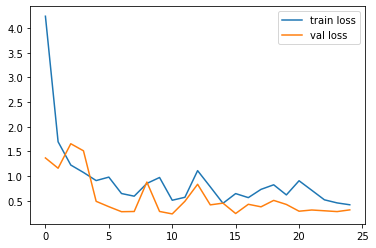

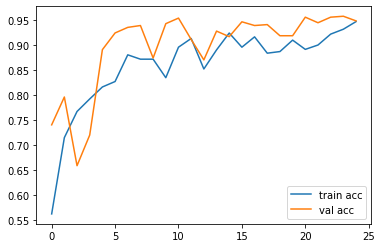

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

**Prediction on test_set**

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/datasets/test/degree0/img100.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'deg_2'
elif result[0][1] ==1:
   prediction= 'deg_1'
else:
  prediction = 'deg_0'

In [ ]:
print(prediction)

deg_2


In [ ]:
#VGG16

**Classification using Keras VGG16 model**

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/datasets/train'
valid_path = '/content/drive/MyDrive/datasets/test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('train')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''


58900480/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
29/29 [==============================] - 699s 24s/step - loss: 1.0488 - accuracy: 0.5707 - val_loss: 0.6477 - val_accuracy: 0.6944
Epoch 2/25
29/29 [==============================] - 696s 24s/step - loss: 0.6983 - accuracy: 0.6935 - val_loss: 0.5272 - val_accuracy: 0.7741
Epoch 3/25
29/29 [==============================] - 671s 23s/step - loss: 0.5511 - accuracy: 0.7793 - val_loss: 0.3973 - val_accuracy: 0.8667
Epoch 4/25
29/29 [==============================] - 672s 23s/step - loss: 0.4519 - accuracy: 0.8337 - val_loss: 0.3465 - val_accuracy: 0.8852
Epoch 5/25
29/29 [==============================] - 691s 24s/step - loss: 0.4285 - accuracy: 0.8500 - val_loss: 0.3080 - val_accuracy: 0.9000
Epoch 6/25
29/29 [==============================] - 676s 24s/step - loss: 0.4522 - accuracy: 0.8185 - val_loss: 0.2870 - val_accuracy: 0.8963
Epoch 7/25
29/29 [==============================] - 668s 23s/step - loss: 0.3497 - accuracy: 0.8707 - val_loss: 0.2799 - val_accuracy: 0.9111
Epoch 

training_loss: 17.75% 

accuracy: 94.13%

 val_loss: 13.10% 
 
 val_accuracy: 96.30%

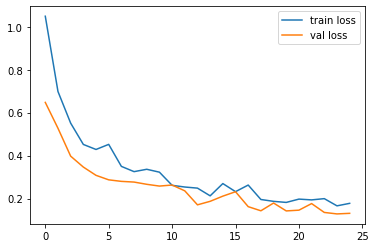

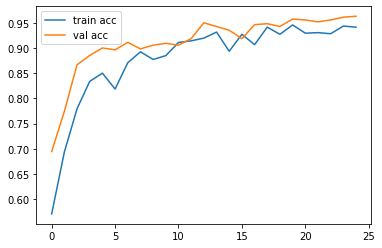

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**Classification using Keras VGG19 model**

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np                                                                                                          
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tf.keras.applications.vgg19.VGG19(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

574726144/574710816 [==============================] - 5s 0us/step


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/datasets/train'
valid_path = '/content/drive/MyDrive/datasets/test'

In [ ]:
# don't train existing weights
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 2s 0us/step


In [ ]:
  # useful for getting number of classes
folders = glob('train')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 920 images belonging to 3 classes.
Found 540 images belonging to 3 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
29/29 [==============================] - 689s 24s/step - loss: 1.2126 - accuracy: 0.5435 - val_loss: 0.6663 - val_accuracy: 0.7148
Epoch 2/25
29/29 [==============================] - 682s 24s/step - loss: 0.6953 - accuracy: 0.6935 - val_loss: 0.4615 - val_accuracy: 0.8407
Epoch 3/25
29/29 [==============================] - 681s 24s/step - loss: 0.6695 - accuracy: 0.7152 - val_loss: 0.4534 - val_accuracy: 0.8204
Epoch 4/25
29/29 [==============================] - 682s 24s/step - loss: 0.5534 - accuracy: 0.7696 - val_loss: 0.4097 - val_accuracy: 0.8352
Epoch 5/25
29/29 [==============================] - 680s 24s/step - loss: 0.4433 - accuracy: 0.8359 - val_loss: 0.3800 - val_accuracy: 0.8444
Epoch 6/25
29/29 [==============================] - 682s 24s/step - loss: 0.4413 - accuracy: 0.8174 - val_loss: 0.3146 - val_accuracy: 0.8963
Epoch 7/25
29/29 [==============================] - 677s 24s/step - loss: 0.3399 - accuracy: 0.8880 - val_loss: 0.2758 - val_accuracy: 0.9204
Epoch 

training_loss: 71.6%

accuracy: 94.24%

val_loss: 11.38%  
 
val_accuracy: 96.84%

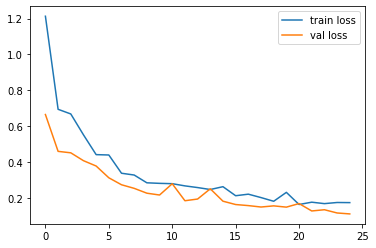

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

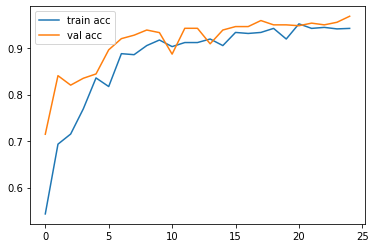

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
def predict_image(img):
    img_4d=img.reshape(-1,180,180,3)
    prediction=model.predict(img_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
#!pip install gradio
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=3)

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://25494.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
